<a href="https://colab.research.google.com/github/Moulis980/Moulis980/blob/main/K-Means_clustering_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [3]:
df=pd.read_csv("/content/Mall_Customers.csv")
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
features = df[['Annual Income (k$)', 'Spending Score (1-100)']]

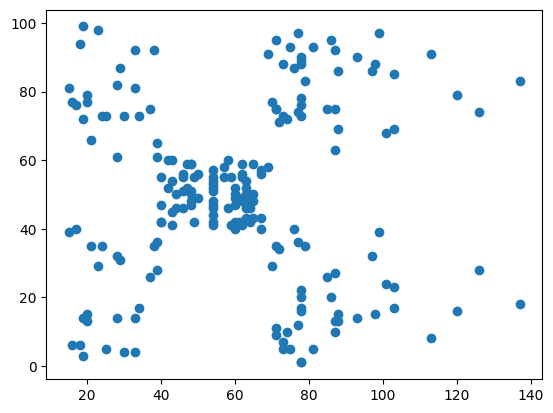

In [6]:
plt.scatter(features['Annual Income (k$)'],features['Spending Score (1-100)'])
plt.show()

Elbow plot

In [7]:
k_rng=range(2,12)
sse=[]
for k in k_rng:
  km=KMeans(n_clusters=k)
  km.fit(features)
  sse.append(km.inertia_)


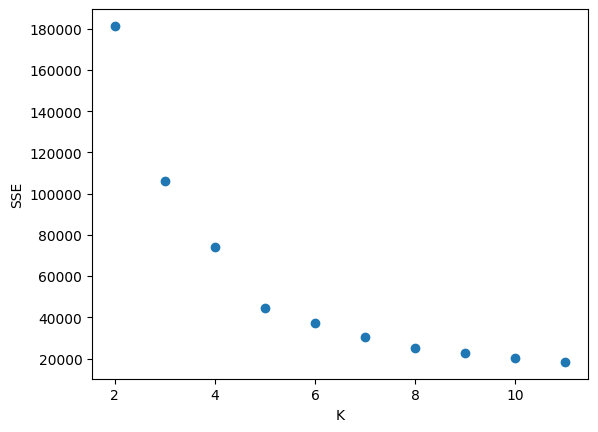

In [8]:
plt.scatter(k_rng,sse)
plt.xlabel("K")
plt.ylabel("SSE")
plt.show()

In [9]:
km=KMeans(n_clusters=6)
y_predicted=km.fit_predict(features)
y_predicted

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 0, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0, 4, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 5, 0, 5, 0, 0, 5, 5, 0, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 2, 5, 2, 1, 2, 1, 2,
       5, 2, 1, 2, 1, 2, 1, 2, 1, 2, 5, 2, 1, 2, 5, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 5, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [10]:
df["Cluster"]=y_predicted
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3


Centroids

In [11]:
km.cluster_centers_

array([[45.51282051, 51.51282051],
       [89.40625   , 15.59375   ],
       [86.53846154, 82.12820513],
       [25.14285714, 19.52380952],
       [24.95      , 81.        ],
       [62.73469388, 46.91836735]])

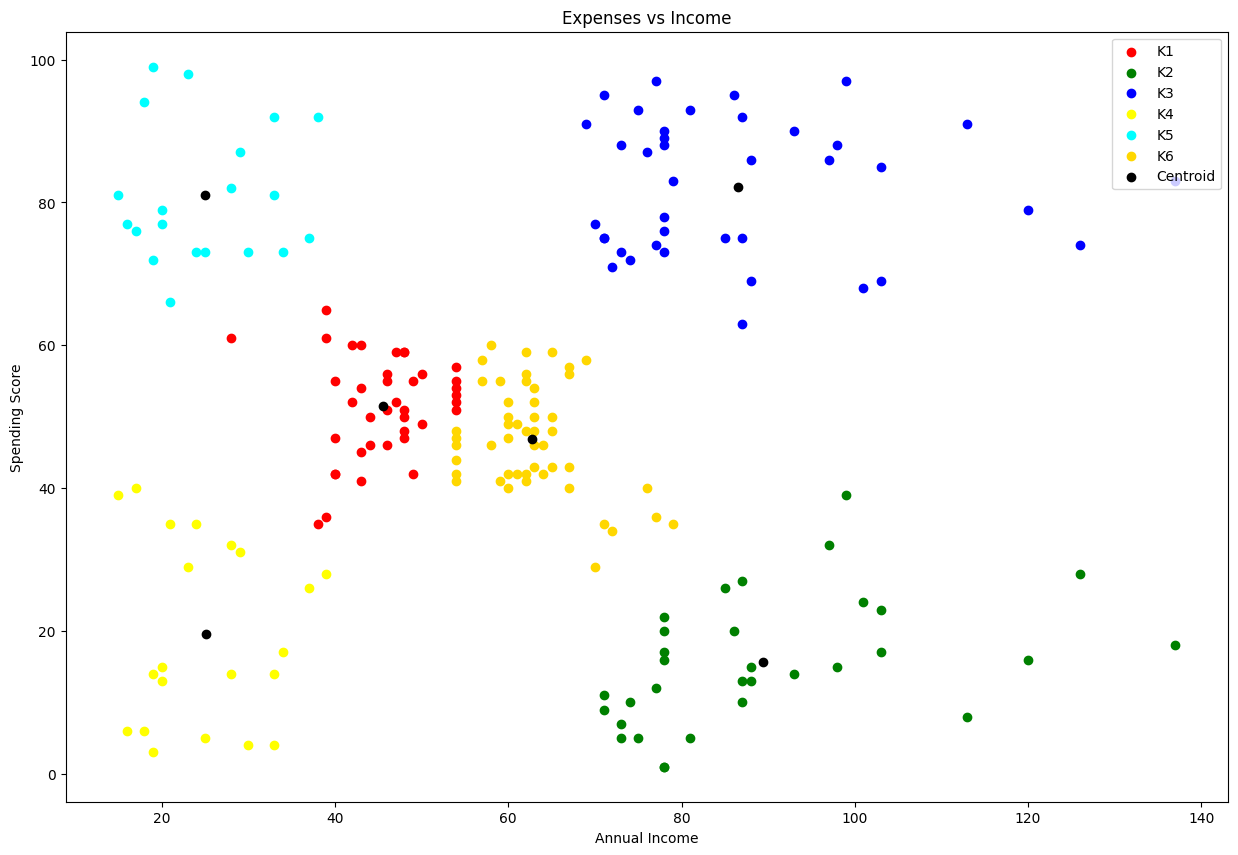

In [17]:
df1=df[df.Cluster==0]
df2=df[df.Cluster==1]
df3=df[df.Cluster==2]
df4=df[df.Cluster==3]
df5=df[df.Cluster==4]
df6=df[df.Cluster==5]

plt.figure(figsize=(15,10))
plt.scatter(df1['Annual Income (k$)'],df1["Spending Score (1-100)"],color="red",label="K1")
plt.scatter(df2['Annual Income (k$)'],df2["Spending Score (1-100)"],color="green",label="K2")
plt.scatter(df3['Annual Income (k$)'],df3["Spending Score (1-100)"],color="blue",label="K3")
plt.scatter(df4['Annual Income (k$)'],df4["Spending Score (1-100)"],color="yellow",label="K4")
plt.scatter(df5['Annual Income (k$)'],df5["Spending Score (1-100)"],color="cyan",label="K5")
plt.scatter(df6['Annual Income (k$)'],df6["Spending Score (1-100)"],color="gold",label="K6")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="black",label="Centroid")

plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Expenses vs Income")
plt.legend(loc="upper right")
plt.show()

In [19]:
scaler=MinMaxScaler()
df["Annual Income (k$)"]=scaler.fit_transform(df[["Annual Income (k$)"]])
df["Spending Score (1-100)"]=scaler.fit_transform(df[["Spending Score (1-100)"]])
df.tail()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
195,196,Female,35,0.860656,0.795918,2
196,197,Female,45,0.909836,0.275510,1
197,198,Male,32,0.909836,0.744898,2
198,199,Male,32,1.000000,0.173469,1
199,200,Male,30,1.000000,0.836735,2


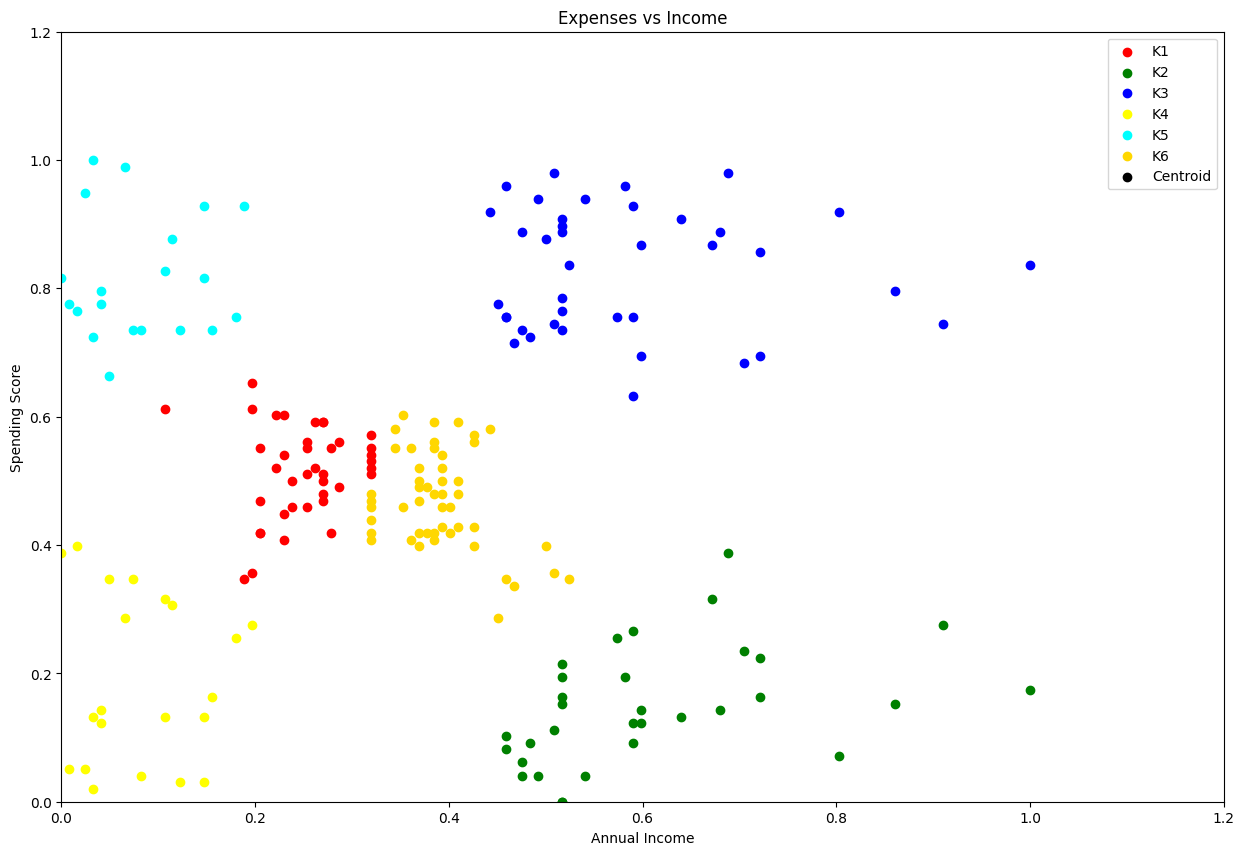

In [22]:
df1=df[df.Cluster==0]
df2=df[df.Cluster==1]
df3=df[df.Cluster==2]
df4=df[df.Cluster==3]
df5=df[df.Cluster==4]
df6=df[df.Cluster==5]

plt.figure(figsize=(15,10))
plt.scatter(df1['Annual Income (k$)'],df1["Spending Score (1-100)"],color="red",label="K1")
plt.scatter(df2['Annual Income (k$)'],df2["Spending Score (1-100)"],color="green",label="K2")
plt.scatter(df3['Annual Income (k$)'],df3["Spending Score (1-100)"],color="blue",label="K3")
plt.scatter(df4['Annual Income (k$)'],df4["Spending Score (1-100)"],color="yellow",label="K4")
plt.scatter(df5['Annual Income (k$)'],df5["Spending Score (1-100)"],color="cyan",label="K5")
plt.scatter(df6['Annual Income (k$)'],df6["Spending Score (1-100)"],color="gold",label="K6")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="black",label="Centroid")

plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.xlim(0,1.2)
plt.ylim(0,1.2)
plt.title("Expenses vs Income")
plt.legend(loc="upper right")
plt.show()